<a href="https://colab.research.google.com/github/FoodSimon/DeepSpectrum/blob/master/activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import default_timer to compute durations
from timeit import default_timer as timer
Debut=timer() # start time

import numpy as np # import numpy library
import pandas as pd # importing pandas library

# scrapping file paths
from glob import glob

# Allows the use of display() for DataFrames
from IPython.display import display 

from matplotlib import pyplot as plt # import matplot. pyplot to allow figure's plotting
#plt.style.use('bmh') # for better plots

In [0]:
# loading datasets(these datasets are the outputs of the signal processing pipeline )
Dataset_type_I_part1 = pd.read_csv('Dataset_I_part1.csv')
Dataset_type_I_part2 = pd.read_csv('Dataset_I_part2.csv')
Dataset_type_II_part1= pd.read_csv('Dataset_II_part1.csv')
Dataset_type_II_part2= pd.read_csv('Dataset_II_part2.csv')

# select parts two be conctenated
frames_I=[Dataset_type_I_part1,Dataset_type_I_part2]
frames_II=[Dataset_type_II_part1,Dataset_type_II_part2]

# concatenate each dataframes' parts
Dataset_type_I=pd.concat(frames_I)
Dataset_type_II=pd.concat(frames_II)

# index reset
Dataset_type_I.reset_index(level=0, drop=True, inplace=True)
Dataset_type_II.reset_index(level=0, drop=True, inplace=True)

In [0]:
Dataset_type_I = Dataset_type_I.dropna()
Dataset_type_II=Dataset_type_II.dropna()

In [0]:

# This function returns a table includes the number of 
# windows per each tuple(user_id , activity id) included in the dataset 

def num_row_user_act(Df):
    
    user_Ids=sorted(Df['user_Id'].unique()) # extracting and sorting unqiue user ids 
    activity_Ids=sorted(Df['activity_Id'].unique()) # extracting and sorting unqiue activity ids 
    act_columns=['Activity '+str(Id) for Id in activity_Ids ] # defining column names used in output table
    
    if len(activity_Ids)==7: # adapting column names in case the function deals with dataset type III
        act_columns=act_columns[0:6]+['P_Transitions'] 
    
    users_index=['User '+ str(int(Id)) for Id in user_Ids] # defining rows names used in output table
    
    # counting the number of windows per each tuple(user_id,activity_id)
    # store these values in 2D numpy array
    data=np.array([ [len(Df[(Df["user_Id"]== user_ID) &(Df["activity_Id"]==activity_ID)]) 
               for activity_ID in activity_Ids ] for user_ID in user_Ids])
    
    # Create a pandas dataframe from the array above
    win_per_act_per_user=pd.DataFrame(data = data,columns=act_columns,index=users_index)
    
    
    return win_per_act_per_user # returns the dataframe

In [0]:
##################################################################################
# This function returns the weights activity and visualize the distribution of a column
# This function will be applied only to target columns
def visualize_column(Df,column):
    
    labels= sorted(Df[column].unique()) # extracting and sorting activity unique ids
    Als_dict={ key: len(Df[Df[column]==key]) for key in labels} # counting the number of windows per activity
    data=[Als_dict[key] for key in labels] # sorting these numbers
    
    weights=np.array(data)/float(np.array(data).sum()) # calculating weights of each activity
    
    columns=["Activity "+str(int(key)) for key in labels] # defining columns of weights' table
    
    Df_weights=pd.DataFrame(data=None,columns=columns)# defining an empty dataframe with column names
    Df_weights.loc['Weights']=weights # appending weights row
    
    print("_____ The weights of each activity _____")
    display(Df_weights) # displying weights table
    print("")
    plt.bar(columns,data) # ploting activity distribution
    plt.xlabel('Activity Labels') # set X axis info
    plt.ylabel('Number of Data points') # set Y axis info
    plt.title('Number of Data points per activity') # set the figure's title
    plt.show() # showing the figure

In [0]:
def data_exploration_pipeline(Dataset,typ,outliers):
    # inputs:
    #        Dataset: a pandas dataframe can be a full dataset (I or II), 
    #               cleaned dataset(I or II or III), outliers dataset (I or II)
    
    #        typ    : integer type of the dataset possible values: 1(for dataset type I), 2(for type II) or 3 (for type III)
    #        outliers: Boolean if true dataset we are dealing with is an outlier dataset(contain outlier values)         
    
    # columns names of the dataset
    columns=Dataset.columns
    
    if not outliers:  # in case we are not dealing with outliers datasets  
        # Adapting the dataset name switch the typ
        if typ==1:
            Dataset_name="Dataset type I "
        if typ==2:
            Dataset_name="Dataset type II "
        if typ==3:
            Dataset_name="Dataset type III "
    else:# in case we are dealing with outliers
        
        # adapting the dataset names switch the case
        if typ==1:
            Dataset_name="Outliers of Dataset type I "
        if typ==2:
            Dataset_name="Outliers ofDataset type II "
    
    # general info about the dataset: number of rows and columns
    print(  Dataset_name+'has a shape of: '+ str(Dataset.shape[0]) +' rows and '+str(Dataset.shape[1])+' columns')
    print("")
    print("")    
    print("")
    
    if not outliers: # in case dataset is not an outlier dataset
        print("The first 3 rows of "+Dataset_name +":")
        display(Dataset.iloc[0:3]) # display the first 3 rows
        print("")
        print("")    
        print("")
        print("rows 500, 501, 502 of "+Dataset_name +":")
        display(Dataset.iloc[500:503]) # display rows 500,501 and 502
        print("")
        print("")    
        print("")
        print("Description of the 10 first features:")
        display(Dataset.describe()[columns[0:10]]) # statistics of the first ten time domain features
        print("")
        print("")    
        print("")
        print("Description of the 10 first frequency features:")
        display(Dataset.describe()[columns[265:275]]) # statistics of the first ten frequency domain features
        print("")
        print("")    
        print("")
    Stats= num_row_user_act(Dataset)# generate number of windows per each tuple (user,activity)
    print("Number of windows per user and per each activity:")
    display(Stats)# display the table
    print("")
    print("")    
    print("")
    print("Statistics of table above:")
    display(Stats.describe())# table's statics
    print("")
    print("")    
    print("")
    visualize_column(Dataset,"activity_Id") # visualize activity distribution of the dataset

Dataset type I has a shape of: 10073 rows and 642 columns



The first 3 rows of Dataset type I :


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,t_body_acc_max()_Y,t_body_acc_max()_Z,t_body_acc_min()_X,t_body_acc_min()_Y,t_body_acc_min()_Z,t_body_acc_sma(),t_body_acc_energy()_X,t_body_acc_energy()_Y,t_body_acc_energy()_Z,t_body_acc_iqr()_X,t_body_acc_iqr()_Y,t_body_acc_iqr()_Z,t_body_acc_entropy()_X,t_body_acc_entropy()_Y,t_body_acc_entropy()_Z,t_body_acc_AR1()_X,t_body_acc_AR2()_X,t_body_acc_AR3()_X,t_body_acc_AR4()_X,t_body_acc_AR1()_Y,t_body_acc_AR2()_Y,t_body_acc_AR3()_Y,t_body_acc_AR4()_Y,t_body_acc_AR1()_Z,t_body_acc_AR2()_Z,t_body_acc_AR3()_Z,t_body_acc_AR4()_Z,"t_body_acc_Corr(X,Y)","t_body_acc_Corr(X,Z)","t_body_acc_Corr(Y,Z)",...,f_body_acc_Jerk_Mag_entropy(),f_body_acc_Jerk_Mag_maxInd(),f_body_acc_Jerk_Mag_meanFreq(),f_body_acc_Jerk_Mag_skewness(),f_body_acc_Jerk_Mag_kurtosis(),f_body_gyro_Mag_mean(),f_body_gyro_Mag_std(),f_body_gyro_Mag_mad(),f_body_gyro_Mag_max(),f_body_gyro_Mag_min(),f_body_gyro_Mag_sma(),f_body_gyro_Mag_energy(),f_body_gyro_Mag_iqr(),f_body_gyro_Mag_entropy(),f_body_gyro_Mag_maxInd(),f_body_gyro_Mag_meanFreq(),f_body_gyro_Mag_skewness(),f_body_gyro_Mag_kurtosis(),f_body_gyro_Jerk_Mag_mean(),f_body_gyro_Jerk_Mag_std(),f_body_gyro_Jerk_Mag_mad(),f_body_gyro_Jerk_Mag_max(),f_body_gyro_Jerk_Mag_min(),f_body_gyro_Jerk_Mag_sma(),f_body_gyro_Jerk_Mag_energy(),f_body_gyro_Jerk_Mag_iqr(),f_body_gyro_Jerk_Mag_entropy(),f_body_gyro_Jerk_Mag_maxInd(),f_body_gyro_Jerk_Mag_meanFreq(),f_body_gyro_Jerk_Mag_skewness(),f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
0,0.002012,0.000431,0.004441,0.004025,0.013983,0.027372,0.004725,0.019132,0.025280,0.010209,0.022011,0.037486,-0.008388,-0.023711,-0.052407,1.729349,0.002592,0.025050,0.098423,0.006390,0.026772,0.040179,4.627741,4.713095,4.663487,-0.648917,-0.142530,-0.215696,0.068287,-1.102750,0.241282,-0.115486,-0.007260,-1.113487,0.136147,-0.120234,0.105898,-0.126617,0.760051,-0.594330,...,4.433703,2.343750,-0.143428,10.262397,109.479058,0.228597,1.284164,0.020874,14.048363,0.005660,2.586283,1.701334,0.034889,2.410065,0.390625,-0.007990,9.859555,102.009805,2.946802,6.532392,1.476830,73.764900,0.096116,33.339261,51.355787,1.776529,4.203892,10.156250,-0.026426,9.977808,104.954731,1.070749,1.431913,2.116867,1.431211,0.152888,1.692169,1.478284,5.0,1.0
1,-0.000713,-0.003098,0.000823,0.004491,0.012449,0.022660,0.004168,0.014039,0.022765,0.009030,0.023948,0.037486,-0.010594,-0.023711,-0.033805,1.513730,0.002647,0.021066,0.065811,0.007073,0.017922,0.042414,4.643639,4.648556,4.731910,-0.944461,0.221464,-0.193098,-0.015072,-1.337638,0.623116,-0.148821,-0.112159,-1.289345,0.670439,-0.382874,0.010639,-0.304517,0.858083,-0.524212,...,4.368601,23.828125,-0.006270,9.418699,97.247870,0.225625,0.967791,0.037356,10.635782,0.013018,2.552651,0.987526,0.076535,3.132107,0.781250,-0.032487,9.806112,101.707195,2.643529,5.568360,1.112259,63.674103,0.217690,29.908117,37.994877,1.472025,4.277547,9.765625,-0.086654,10.287230,109.749747,1.652580,1.856253,1.210803,1.753009,0.149532,1.687352,1.477548,5.0,1.0
2,-0.000301,0.004025,-0.004280,0.004866,0.009352,0.016821,0.005255,0.010157,0.020681,0.011261,0.023948,0.026609,-0.010594,-0.014186,-0.033805,1.192611,0.003042,0.013269,0.038562,0.007601,0.013088,0.031358,4.649658,4.570595,4.711468,-1.293980,0.737666,-0.175160,-0.182953,-1.436772,0.747077,-0.204952,-0.061251,-1.336866,0.752157,-0.427443,0.028713,-0.115408,0.744514,-0.232998,...,4.350646,1.562500,-0.238134,9.662137,100.665456,0.183161,0.826248,0.035944,8.995844,0.003934,2.072229,0.716233,0.077647,2.938408,0.781250,-0.007988,9.594261,98.282726,2.617015,5.236178,0.990102,60.095290,0.302450,29.608149,34.266330,1.715716,4.330214,19.531250,-0.025288,10.333483,110.445137,1.776612,1.159471,1.763958,2.682216,0.157004,1.696158,1.476770,5.0,1.0





rows 500, 501, 502 of Dataset type I :


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,t_body_acc_max()_Y,t_body_acc_max()_Z,t_body_acc_min()_X,t_body_acc_min()_Y,t_body_acc_min()_Z,t_body_acc_sma(),t_body_acc_energy()_X,t_body_acc_energy()_Y,t_body_acc_energy()_Z,t_body_acc_iqr()_X,t_body_acc_iqr()_Y,t_body_acc_iqr()_Z,t_body_acc_entropy()_X,t_body_acc_entropy()_Y,t_body_acc_entropy()_Z,t_body_acc_AR1()_X,t_body_acc_AR2()_X,t_body_acc_AR3()_X,t_body_acc_AR4()_X,t_body_acc_AR1()_Y,t_body_acc_AR2()_Y,t_body_acc_AR3()_Y,t_body_acc_AR4()_Y,t_body_acc_AR1()_Z,t_body_acc_AR2()_Z,t_body_acc_AR3()_Z,t_body_acc_AR4()_Z,"t_body_acc_Corr(X,Y)","t_body_acc_Corr(X,Z)","t_body_acc_Corr(Y,Z)",...,f_body_acc_Jerk_Mag_entropy(),f_body_acc_Jerk_Mag_maxInd(),f_body_acc_Jerk_Mag_meanFreq(),f_body_acc_Jerk_Mag_skewness(),f_body_acc_Jerk_Mag_kurtosis(),f_body_gyro_Mag_mean(),f_body_gyro_Mag_std(),f_body_gyro_Mag_mad(),f_body_gyro_Mag_max(),f_body_gyro_Mag_min(),f_body_gyro_Mag_sma(),f_body_gyro_Mag_energy(),f_body_gyro_Mag_iqr(),f_body_gyro_Mag_entropy(),f_body_gyro_Mag_maxInd(),f_body_gyro_Mag_meanFreq(),f_body_gyro_Mag_skewness(),f_body_gyro_Mag_kurtosis(),f_body_gyro_Jerk_Mag_mean(),f_body_gyro_Jerk_Mag_std(),f_body_gyro_Jerk_Mag_mad(),f_body_gyro_Jerk_Mag_max(),f_body_gyro_Jerk_Mag_min(),f_body_gyro_Jerk_Mag_sma(),f_body_gyro_Jerk_Mag_energy(),f_body_gyro_Jerk_Mag_iqr(),f_body_gyro_Jerk_Mag_entropy(),f_body_gyro_Jerk_Mag_maxInd(),f_body_gyro_Jerk_Mag_meanFreq(),f_body_gyro_Jerk_Mag_skewness(),f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
500,-0.002612,0.001936,-0.001619,0.189157,0.185271,0.183038,0.143988,0.175647,0.132513,0.591082,0.340976,0.299989,-0.288173,-0.523214,-0.591224,18.516819,4.580765,4.394130,4.288706,0.254524,0.218544,0.176584,4.580728,4.573972,4.468783,-1.773026,1.595609,-0.967923,0.304865,-1.753475,1.342671,-0.620313,0.098275,-1.860849,1.526611,-0.781356,0.213876,-0.081842,-0.573543,0.029331,...,4.441337,1.5625,-0.163026,8.395829,81.940236,3.118015,8.867589,1.170021,97.750587,0.028894,35.276314,88.356145,1.902068,3.814810,1.5625,-0.013402,9.554499,98.430929,100.607391,152.764428,39.078640,1701.847368,11.642848,1138.242699,33458.817628,50.752383,4.441517,1.5625,-0.083310,9.075925,91.491078,2.062117,2.679764,1.156250,2.219589,0.678680,1.872693,2.156621,2.0,2.0
501,-0.004327,0.000869,-0.001459,0.182054,0.194016,0.194199,0.143727,0.216793,0.127459,0.579079,0.340976,0.299989,-0.253216,-0.530753,-0.701755,18.973112,4.244775,4.818311,4.827546,0.238238,0.278777,0.170466,4.529506,4.654344,4.451882,-1.605992,1.293715,-0.799275,0.278665,-1.737045,1.411207,-0.810289,0.207910,-1.777318,1.294410,-0.588325,0.164750,-0.123859,-0.552853,0.049954,...,4.404252,1.5625,-0.141285,8.400351,81.376702,2.993487,8.930141,1.077506,98.276911,0.126648,33.867435,88.708387,2.312275,3.756484,1.5625,-0.041151,9.562423,98.380530,117.062653,170.774946,63.445542,1840.656381,14.799096,1324.412736,42867.747051,88.186004,4.425893,1.5625,-0.280836,8.186159,78.446975,2.215386,0.809965,1.322636,1.171731,0.683628,1.868445,2.164451,2.0,2.0
502,0.000866,-0.002031,-0.002663,0.184468,0.172920,0.201545,0.138529,0.199514,0.139102,0.579079,0.254404,0.314729,-0.253216,-0.530753,-0.701755,18.858693,4.355738,3.827896,5.200337,0.210199,0.270302,0.202838,4.541909,4.643716,4.534817,-1.657269,1.397474,-0.863014,0.283937,-1.749402,1.486111,-0.813096,0.156718,-1.793391,1.361558,-0.687909,0.223469,-0.299381,-0.638962,0.150363,...,4.323768,1.5625,-0.083530,7.786158,71.877010,2.947069,8.246789,1.331449,89.129183,0.022605,33.342285,76.694745,2.094519,3.833916,1.5625,-0.028588,9.108268,90.634119,119.492902,162.593493,53.676645,1741.416660,15.429791,1351.907863,40715.197488,78.584881,4.456542,1.5625,-0.273762,7.895256,74.697056,0.646230,2.160502,2.508356,0.320551,0.689991,1.858852,2.176837,2.0,2.0





Description of the 10 first features:


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X
count,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000
mean,0.000183,-0.000255,0.000046,0.127983,0.085495,0.071057,0.121025,0.077513,0.065073,0.313537
std,0.009068,0.006838,0.006721,0.140206,0.081906,0.068497,0.133170,0.073618,0.060332,0.345719
min,-0.047488,-0.038424,-0.043539,0.001815,0.002281,0.003507,0.001536,0.002089,0.002521,0.003151
25%,-0.003122,-0.003634,-0.003354,0.009123,0.011926,0.011608,0.009770,0.012707,0.012458,0.017993
50%,0.000084,-0.000122,-0.000061,0.022627,0.030839,0.028478,0.024245,0.032005,0.030503,0.050674
75%,0.003297,0.003248,0.003265,0.242596,0.159981,0.127097,0.231176,0.141404,0.115169,0.611927
max,0.046679,0.036071,0.043209,0.635720,0.341042,0.353751,0.655178,0.339054,0.364321,1.226526





Description of the 10 first frequency features:


,f_body_acc_mean()_X,f_body_acc_mean()_Y,f_body_acc_mean()_Z,f_body_acc_std()_X,f_body_acc_std()_Y,f_body_acc_std()_Z,f_body_acc_mad()_X,f_body_acc_mad()_Y,f_body_acc_mad()_Z,f_body_acc_max()_X
count,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000
mean,0.742052,0.549131,0.449240,1.242877,0.796707,0.666156,0.329175,0.261291,0.239571,7.935504
std,0.817015,0.553114,0.453975,1.363967,0.747047,0.633196,0.383090,0.291869,0.274338,8.940529
min,0.015014,0.019182,0.028569,0.013632,0.019417,0.025974,0.006711,0.006004,0.011886,0.051908
25%,0.045144,0.057282,0.061410,0.094985,0.125044,0.119742,0.019568,0.021276,0.029961,0.669745
50%,0.120250,0.158870,0.145056,0.234204,0.318961,0.299422,0.059100,0.058771,0.062901,1.684758
75%,1.440149,1.054419,0.823077,2.325653,1.473351,1.157368,0.611034,0.487584,0.418191,14.515625
max,3.719777,2.372634,2.425497,6.200617,3.282382,3.366875,2.225230,1.859802,2.177071,43.848146





Number of windows per user and per each activity:


,Activity 1.0,Activity 2.0,Activity 3.0,Activity 4.0,Activity 5.0,Activity 6.0
User 1,95,53,49,47,55,48
User 2,59,48,47,46,55,49
User 3,58,59,49,51,63,63
User 4,60,52,45,48,56,52
User 5,56,47,47,43,57,51
User 6,57,51,48,56,58,56
User 7,57,51,47,47,54,50
User 8,47,41,38,45,57,55
User 9,52,49,42,53,49,54
User 10,53,47,38,55,46,59





Statistics of table above:


,Activity 1.0,Activity 2.0,Activity 3.0,Activity 4.0,Activity 5.0,Activity 6.0
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,55.166667,49.266667,44.800000,58.366667,64.766667,63.400000
std,13.651028,10.686548,9.809918,13.254754,13.672735,14.269814
min,0.000000,0.000000,0.000000,18.000000,30.000000,18.000000
25%,52.000000,48.000000,44.250000,49.500000,55.250000,54.250000
50%,56.500000,51.000000,46.500000,58.000000,62.500000,64.500000
75%,59.000000,53.750000,48.000000,67.750000,76.500000,73.750000
max,95.000000,65.000000,58.000000,85.000000,94.000000,90.000000





_____ The weights of each activity _____


,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6
Weights,0.164301,0.146729,0.133426,0.173831,0.192892,0.188822


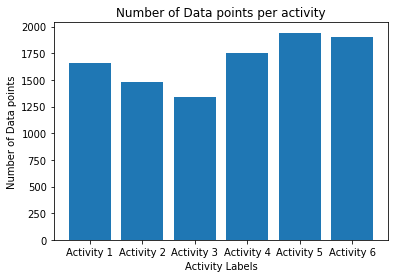

In [29]:

# apply the data_exploration_pipeline to dataset type 1
data_exploration_pipeline(Dataset_type_I,1,False)